Armónicos detectados:
    0.0 Hz  ->  0.0020
   50.0 Hz  ->  1.2732
  100.0 Hz  ->  0.0020
  150.0 Hz  ->  0.4244
  200.0 Hz  ->  0.0020
  250.0 Hz  ->  0.2546
  300.0 Hz  ->  0.0020
  350.0 Hz  ->  0.1819
  400.0 Hz  ->  0.0020
  450.0 Hz  ->  0.1414

Valor RMS de la señal: 1.0000

THD = 710.0715 (relativo)
THD = 71007.15%


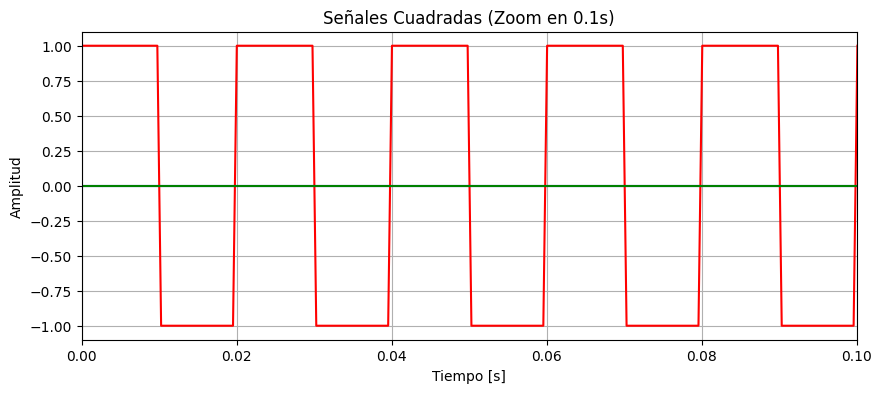

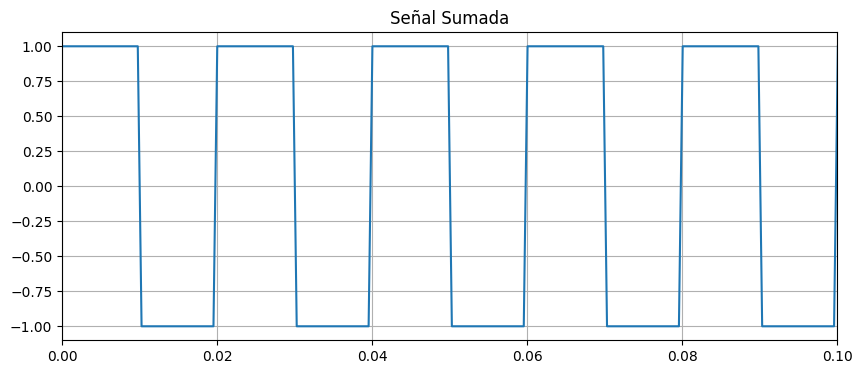

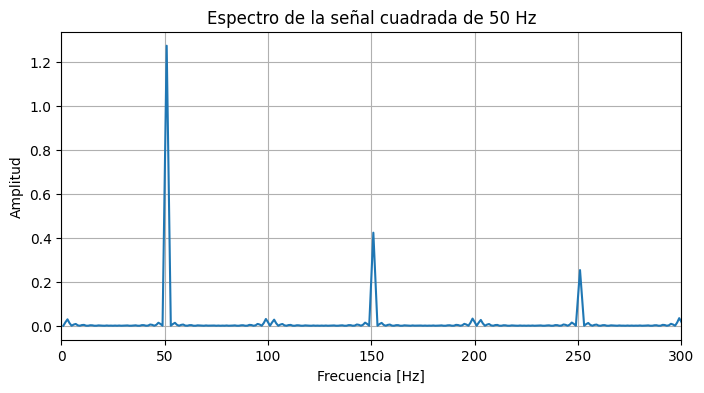

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import square

# Armado de la señal

fs = 2048  # Frecuencia de muestreo (Hz)
t = np.linspace(0, 1, fs, endpoint=False)  # 1 segundo

# Amplitud y frecuencia
A1,A2,A3 = 1,0,0

f1,f2,f3 = 50,100,150

sig1 = A1 * square(2 * np.pi * f1 * t,duty = 0.5)
sig2 = A2 * np.sin(2 * np.pi * f2 * t)
sig3 = A3 * np.sin(2 * np.pi * f3 * t)

signal = sig1 + sig2 + sig3

# ==============================
# 2. Aplicar ventana y FFT
# ==============================
N = len(signal)

window = np.hanning(N) #Ventana Hanning
#window = np.blackman(N) #Ventana Blackman

signal_windowed = signal * window

fft_vals = np.fft.fft(signal_windowed)
freqs = np.fft.fftfreq(N, 1/fs)

# Mitad positiva
idx = np.where(freqs >= 0)
freqs = freqs[idx]
amps = (2 * np.abs(fft_vals[idx])) / N
amps = amps / np.mean(window)  # Compensación por la ventana

# ==============================
# 3. Extraer armónicos principales
# ==============================
harmonics = []
for n in range(0, 10):  # hasta el 9° armónico
    f_target = n * f1
    idx = np.argmin(np.abs(freqs - f_target))
    harmonics.append((freqs[idx], amps[idx]))

# ==============================
# 4. Calculo THD y RMS
# ==============================

#Calculo RMS

rms_val = np.sqrt(np.mean(signal**2))

#Calculo THD

if len(harmonics) > 1:
    fundamental_amp = harmonics[0][1]
    other = [h[1] for h in harmonics[1:]]
    thd = np.sqrt(np.sum(np.array(other)**2)) / (fundamental_amp + 1e-12)
else:
    thd = 0.0

print("Armónicos detectados:")
for f, a in harmonics:
    print(f"{f:7.1f} Hz  ->  {a:.4f}")

print(f"\nValor RMS de la señal: {rms_val:.4f}")
print(f"\nTHD = {thd:.4f} (relativo)")
print(f"THD = {thd*100:.2f}%")


# ==============================
# 5. Visualización
# ==============================
plt.figure(figsize=(10, 4))
plt.title('Señales Cuadradas (Zoom en 0.1s)')
plt.plot(t, sig1, color='red')
plt.plot(t, sig2, color='blue')
plt.plot(t, sig3, color='green')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.xlim(0, 0.1)  # Zoom en los primeros 0.1 segundos
plt.show()

plt.figure(figsize=(10, 4))
plt.title('Señal Sumada')
plt.plot(t, signal)
plt.grid(True)
plt.xlim(0, 0.1)  # Zoom en los primeros 0.1 segundos
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(freqs, amps)
plt.title("Espectro de la señal cuadrada de 50 Hz")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Amplitud")
plt.grid(True)
plt.xlim(0, 300)
plt.show()